# **Математические строительные блоки нейронных сетей**

# **Первый взгляд на нейронную сеть**

**Загрузка набора данных MNIST в Keras**

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**Сетевая архитектура**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**Этап компиляции**


In [ ]:
model.compile(optimizer="rmsprop",
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])

**Подготовка данных изображения**

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

 **«Подгонка» модели**

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 0.2644 - accuracy: 0.9241
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1079 - accuracy: 0.9683
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0713 - accuracy: 0.9790
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0509 - accuracy: 0.9845
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0390 - accuracy: 0.9887


**Использование модели для прогнозирования**

In [ ]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 129ms/step


array([2.2034753e-07, 3.5187702e-09, 2.9596620e-05, 1.1040308e-03,
       7.9507290e-11, 5.1143297e-07, 3.3863973e-12, 9.9881083e-01,
       1.5083116e-06, 5.3373235e-05], dtype=float32)

In [ ]:
predictions[0].argmax()

7

In [ ]:
predictions[0][7]

0.9988108

In [ ]:
test_labels[0]

7

**Оценка модели на новых данных**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0660 - accuracy: 0.9785
test_acc: 0.9785000085830688


# **Представления данных для нейронных сетей**

# **Скаляры (тензоры ранга 0)**

In [ ]:
import numpy as np
x = np.array(12)
x

array(12)

In [ ]:
x.ndim

0

# **Векторы (тензоры 1-го ранга)**

In [ ]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [ ]:
x.ndim

1

# **Матрицы (тензоры 2-го ранга)**

In [ ]:
x = np.array([[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]])
x.ndim

2

# **Тензоры 3-го ранга и выше**

In [ ]:
x = np.array([[[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]],
[[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]],
[[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]]])
x.ndim

3

# **Ключевые атрибуты**

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.ndim

3

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images.dtype

dtype('uint8')

**Отображение четвертой цифры**

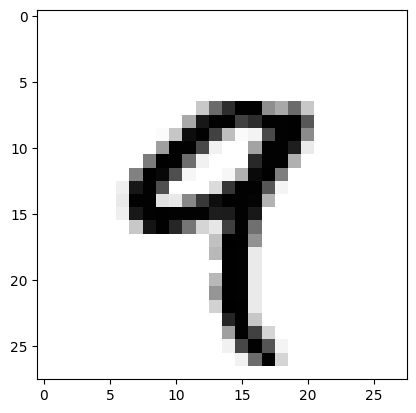

In [ ]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
train_labels[4]

9

# **Манипулирование тензорами в NumPy**

In [ ]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[:, 14:, 14:]

In [ ]:
my_slice = train_images[:, 7:-7, 7:-7]

# **Понятие пакетов данных**

In [ ]:
batch = train_images[:128]

In [ ]:
batch = train_images[128:256]

In [ ]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

Примеры данных тензоров в реальном мире:

Данные векторов

Данные временных рядов или последовательностей

Данные изображений

Данные видео

# **Механизмы нейронных сетей: тензорные операции**


# **Поэлементные операции**

In [ ]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [ ]:
x

array([[[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]]])

In [ ]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [ ]:
x

array([[[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]]])

In [ ]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s


In [ ]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 1.95 s


# **Вещание**

In [ ]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [ ]:
y = np.expand_dims(y, axis=0)

In [ ]:
Y = np.concatenate([y] * 32, axis=0)

In [ ]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [ ]:
x

array([[0.07370988, 0.60981967, 0.08338924, ..., 0.11884954, 0.84596189,
        0.79476751],
       [0.90909371, 0.97303385, 0.80870783, ..., 0.8737091 , 0.12482501,
        0.28307372],
       [0.36154382, 0.92510287, 0.10071515, ..., 0.68891765, 0.07013925,
        0.04948718],
       ...,
       [0.54626262, 0.8371052 , 0.61817316, ..., 0.36696401, 0.98049058,
        0.05946444],
       [0.50094665, 0.37662271, 0.84949026, ..., 0.54839629, 0.35861573,
        0.89648541],
       [0.15963423, 0.77017514, 0.6035559 , ..., 0.59409813, 0.70053317,
        0.33989356]])

In [ ]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

# **Тензорное произведение**

In [ ]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [ ]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [ ]:
z

9.198791029596643

In [ ]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [ ]:
z

9.198791029596643

In [ ]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [ ]:
z

9.198791029596643

In [ ]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

In [ ]:
z

9.198791029596643

# **Изменение формы тензора**

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))

In [ ]:
x = np.array([[0., 1.],
[2., 3.],
[4., 5.]])
x.shape

(3, 2)

In [ ]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [ ]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

Геометрическая интерпретация операций с тензорами

Геометрическое толкование глубокого обучения

## **Двигатель нейронных сетей: оптимизация на основе градиентов**

Что такое производная?

Производная операции с тензором: градиент

Стохастический градиентный спуск


1. **Что такое производная?**
   
   Производная функции в математике показывает, как быстро изменяется эта функция в зависимости от её аргумента. Говоря простыми словами, это показывает скорость изменения функции в данной точке. Если функция описывает зависимость одной переменной от другой, то её производная указывает на скорость изменения значения этой переменной по отношению к изменению значения другой переменной.

2. **Производная операции с тензором: градиент**
   
   Это обобщение понятия производной на многомерные пространства. В контексте нейронных сетей, градиент обычно означает вектор, содержащий частные производные функции потерь (ошибки) по отношению к параметрам сети. Он показывает направление наибольшего увеличения функции потерь и используется в алгоритмах оптимизации для обновления параметров так, чтобы уменьшить эту ошибку.

3. **Стохастический градиентный спуск**
   
   Это метод оптимизации, используемый для обучения нейронных сетей. Он работает путем итеративного обновления параметров сети в направлении, противоположном градиенту функции потерь. Однако, в отличие от обычного градиентного спуска, который вычисляет градиент по всему набору данных (батчу), SGD вычисляет градиенты и обновляет параметры по одному примеру или небольшому набору примеров. Это позволяет SGD эффективно работать с большими наборами данных, а также помогает ему избегать локальных минимумов и сойтись к глобальному оптимуму.

### Цепные производные: алгоритм обратного распространения ошибки

Правило цепочки

Автоматическое дифференцирование с вычислительными графами



1. **Правило цепочки**
   
   Это ключевой принцип дифференцирования сложных функций, который используется при вычислении градиента функции, состоящей из последовательности операций. Оно утверждает, что производная композиции функций равна произведению производных этих функций. Формально, если у нас есть функция \( y = f(g(x)) \), то её производная {dy}/{dx} \) выражается через производные \( f'(g(x)) \) и \( g'(x) \) по правилу цепочки как {dy}/{dx} = f'(g(x)) * g'(x) \). Это правило играет ключевую роль в обратном распространении ошибки, используемом при обучении нейронных сетей.

2. **Автоматическое дифференцирование с вычислительными графами**
   
   (AutoDiff) - это метод вычисления производных функций компьютерным способом, который использует правило цепочки. Вычислительные графы представляют собой модель вычислений, где узлы представляют операции, а рёбра - данные, проходящие через эти операции. При использовании автоматического дифференцирования с вычислительными графами производная вычисляется в процессе прямого прохода через граф, а затем в обратном направлении, используя правило цепочки. Этот метод является основой для алгоритма обратного распространения ошибки в обучении нейронных сетей, так как он позволяет эффективно вычислять градиенты функции потерь по параметрам сети.

# **Градиентная лента в TensorFlow**

In [ ]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [ ]:
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [ ]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

# **Возвращаясь к нашему первому примеру**

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [ ]:
model = keras.Sequential([
layers.Dense(512, activation="relu"),
layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(optimizer="rmsprop",
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.2622 - accuracy: 0.9255
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1065 - accuracy: 0.9687
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0703 - accuracy: 0.9787
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0521 - accuracy: 0.9849
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0388 - accuracy: 0.9883


# **Переопределение нашего первого примера с нуля в TensorFlow**

## Простой Dense-класс

In [ ]:
import tensorflow as tf
class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

## Простой последовательный класс

In [ ]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
            x = layer(x)
        return x

    @property
    def weights(self):
        weights = []
        for layer in self.layers:
            weights += layer.weights
        return weights

In [ ]:
model = NaiveSequential([
NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

## Пакетный генератор

In [ ]:
import math
class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

## Выполнение одного тренировочного шага

In [ ]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)  # Вызовите функцию для обновления весов
    return average_loss.numpy()  # Вернуть среднее значение потерь в виде массива NumPy для совместимости

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)


In [ ]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

# **Полный цикл обучения**

In [ ]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

Epoch 0
loss at batch 0: 5.98
loss at batch 100: 2.24
loss at batch 200: 2.21
loss at batch 300: 2.09
loss at batch 400: 2.23
Epoch 1
loss at batch 0: 1.91
loss at batch 100: 1.87
loss at batch 200: 1.82
loss at batch 300: 1.72
loss at batch 400: 1.83
Epoch 2
loss at batch 0: 1.58
loss at batch 100: 1.57
loss at batch 200: 1.49
loss at batch 300: 1.41
loss at batch 400: 1.51
Epoch 3
loss at batch 0: 1.31
loss at batch 200: 1.22
loss at batch 300: 1.20
loss at batch 400: 1.27
Epoch 4
loss at batch 0: 1.12
loss at batch 100: 1.15
loss at batch 200: 1.03
loss at batch 300: 1.03
loss at batch 400: 1.11
Epoch 5
loss at batch 0: 0.97
loss at batch 100: 1.01
loss at batch 200: 0.89
loss at batch 300: 0.92
loss at batch 400: 0.98
Epoch 6
loss at batch 0: 0.86
loss at batch 100: 0.91
loss at batch 200: 0.79
loss at batch 300: 0.83
loss at batch 400: 0.90
Epoch 7
loss at batch 0: 0.78
loss at batch 100: 0.82
loss at batch 200: 0.71
loss at batch 300: 0.76
loss at batch 400: 0.83
Epoch 8
loss at 

# Оценка модели

In [ ]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

accuracy: 0.81
